In [4]:
# Getting data from the uber dataset
apr14 <- read.csv("https://raw.githubusercontent.com/fivethirtyeight/uber-tlc-foil-response/master/uber-trip-data/uber-raw-data-apr14.csv")
may14 <- read.csv("https://raw.githubusercontent.com/fivethirtyeight/uber-tlc-foil-response/master/uber-trip-data/uber-raw-data-may14.csv")
jun14 <- read.csv("https://raw.githubusercontent.com/fivethirtyeight/uber-tlc-foil-response/master/uber-trip-data/uber-raw-data-jun14.csv")
jul14 <- read.csv("https://raw.githubusercontent.com/fivethirtyeight/uber-tlc-foil-response/master/uber-trip-data/uber-raw-data-jul14.csv")
aug14 <- read.csv("https://raw.githubusercontent.com/fivethirtyeight/uber-tlc-foil-response/master/uber-trip-data/uber-raw-data-aug14.csv")
sep14 <- read.csv("https://raw.githubusercontent.com/fivethirtyeight/uber-tlc-foil-response/master/uber-trip-data/uber-raw-data-sep14.csv")

In [5]:
install.packages("dplyr")

Installing package into ‘/usr/local/lib/R/3.6/site-library’
(as ‘lib’ is unspecified)



In [6]:
install.packages("scales")

Installing package into ‘/usr/local/lib/R/3.6/site-library’
(as ‘lib’ is unspecified)



In [7]:
library(dplyr)
data14 <- bind_rows(apr14, may14, jun14, jul14, aug14, sep14)
summary(data14)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




              Date.Time            Lat             Lon             Base        
 4/7/2014 20:21:00 :     97   Min.   :39.66   Min.   :-74.93   B02512: 205673  
 6/13/2014 18:03:00:     88   1st Qu.:40.72   1st Qu.:-74.00   B02598:1393113  
 4/7/2014 20:22:00 :     87   Median :40.74   Median :-73.98   B02617:1458853  
 9/13/2014 18:44:00:     82   Mean   :40.74   Mean   :-73.97   B02682:1212789  
 9/13/2014 18:41:00:     80   3rd Qu.:40.76   3rd Qu.:-73.97   B02764: 263899  
 7/15/2014 19:30:00:     79   Max.   :42.12   Max.   :-72.07                   
 (Other)           :4533814                                                    

In [18]:
install.packages('sp')
install.packages('Rcpp')
install.packages('ellipsis')
install.packages('car')
install.packages('glue')
install.packages('VIM')

Installing package into ‘/usr/local/lib/R/3.6/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/3.6/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/3.6/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/3.6/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/3.6/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/3.6/site-library’
(as ‘lib’ is unspecified)



Loading required package: colorspace

Loading required package: grid

VIM is ready to use.


Suggestions and bug-reports can be submitted at: https://github.com/statistikat/VIM/issues


Attaching package: ‘VIM’


The following object is masked from ‘package:datasets’:

    sleep




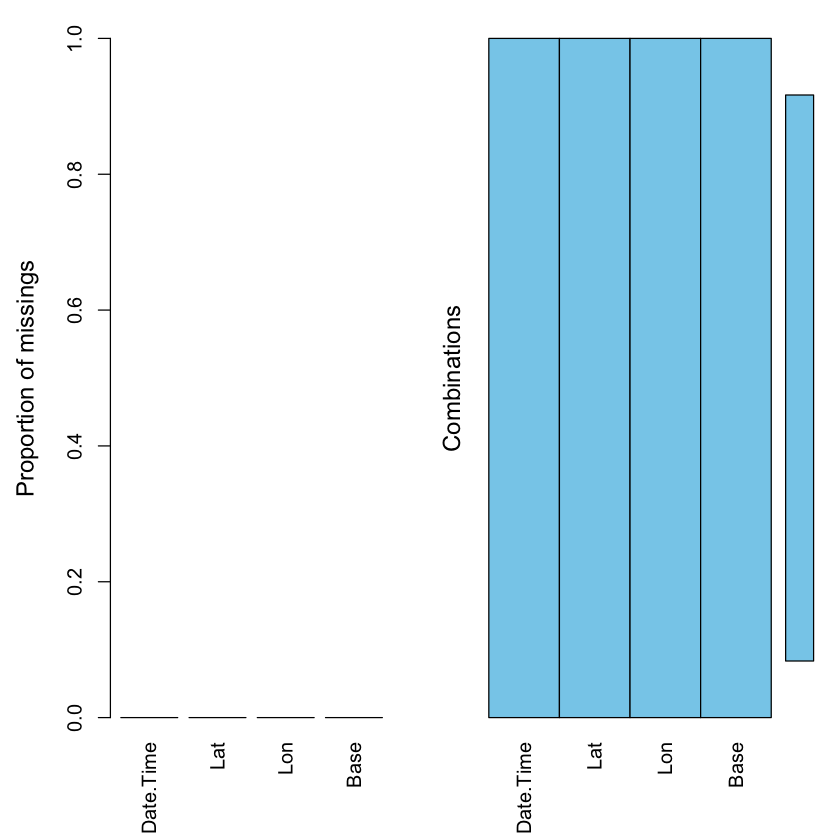

In [19]:
library(VIM)
aggr(data14)

In [21]:
install.packages('lubridate')

Installing package into ‘/usr/local/lib/R/3.6/site-library’
(as ‘lib’ is unspecified)



In [22]:
library(lubridate)

# Separate or mutate the Date/Time columns
data14$Date.Time <- mdy_hms(data14$Date.Time)
data14$Year <- factor(year(data14$Date.Time))
data14$Month <- factor(month(data14$Date.Time))
data14$Day <- factor(day(data14$Date.Time))
data14$Weekday <- factor(wday(data14$Date.Time))
data14$Hour <- factor(hour(data14$Date.Time))
data14$Minute <- factor(minute(data14$Date.Time))
data14$Second <- factor(second(data14$Date.Time))

#data14$date_time
data14$Month


Attaching package: ‘lubridate’


The following objects are masked from ‘package:base’:

    date, intersect, setdiff, union




[1] 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
   [37] 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
   [73] 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
  [109] 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
  [145] 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
  [181] 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
  [217] 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
  [253] 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
  [289] 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
  [325] 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
  [361] 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
  [397] 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
  [433] 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
  [469] 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
  [505] 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
  [541] 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
  [577] 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
  [613] 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
  [649] 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
  [685] 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
  [721] 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
  [757] 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
  [793] 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
  [829] 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
  [865] 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
  [901] 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
  [937] 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
  [973] 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 [1009] 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 [1045] 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 [1081] 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 [1117] 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 [1153] 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 [1189] 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 [1225] 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 [1261] 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 [1297] 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 [1333] 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 [1369] 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 [1405] 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 [1441] 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 [1477] 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 [1513] 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 [1549] 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 [1585] 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 [1621] 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 [1657] 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 [1693] 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 [1729] 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 [1765] 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 [18

In [23]:
head(data14, n=10)

,Date.Time,Lat,Lon,Base,Year,Month,Day,Weekday,Hour,Minute,Second
,<dttm>,<dbl>,<dbl>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>
1,2014-04-01 00:11:00,40.7690,-73.9549,B02512,2014,4,1,3,0,11,0
2,2014-04-01 00:17:00,40.7267,-74.0345,B02512,2014,4,1,3,0,17,0
3,2014-04-01 00:21:00,40.7316,-73.9873,B02512,2014,4,1,3,0,21,0
4,2014-04-01 00:28:00,40.7588,-73.9776,B02512,2014,4,1,3,0,28,0
5,2014-04-01 00:33:00,40.7594,-73.9722,B02512,2014,4,1,3,0,33,0
6,2014-04-01 00:33:00,40.7383,-74.0403,B02512,2014,4,1,3,0,33,0
7,2014-04-01 00:39:00,40.7223,-73.9887,B02512,2014,4,1,3,0,39,0
8,2014-04-01 00:45:00,40.7620,-73.9790,B02512,2014,4,1,3,0,45,0
9,2014-04-01 00:55:00,40.7524,-73.9960,B02512,2014,4,1,3,0,55,0


In [24]:
set.seed(20)
clusters <- kmeans(data14[,2:3], 5)

# Save the cluster number in the dataset as column 'Borough'
data14$Borough <- as.factor(clusters$cluster)

# Inspect 'clusters'
str(clusters)

List of 9
 $ cluster     : int [1:4534327] 2 4 4 2 2 4 4 2 4 2 ...
 $ centers     : num [1:5, 1:2] 40.7 40.8 40.7 40.7 40.7 ...
  ..- attr(*, "dimnames")=List of 2
  .. ..$ : chr [1:5] "1" "2" "3" "4" ...
  .. ..$ : chr [1:2] "Lat" "Lon"
 $ totss       : num 22107
 $ withinss    : num [1:5] 471 1650 997 719 3524
 $ tot.withinss: num 7361
 $ betweenss   : num 14746
 $ size        : int [1:5] 45366 1502128 581266 2128911 276656
 $ iter        : int 4
 $ ifault      : int 0
 - attr(*, "class")= chr "kmeans"


In [26]:
install.packages('ggmap')

Installing package into ‘/usr/local/lib/R/3.6/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘RgoogleMaps’, ‘plyr’, ‘rjson’, ‘jpeg’, ‘tidyr’




In [27]:
library(ggmap)

NYCMap <- get_map("New York", zoom = 10)
ggmap(NYCMap) + geom_point(aes(x = Lon[], y = Lat[], colour = as.factor(Borough)),data = data14) +
  ggtitle("NYC Boroughs using KMean")

Loading required package: ggplot2

Google's Terms of Service: https://cloud.google.com/maps-platform/terms/.

Please cite ggmap if you use it! See citation("ggmap") for details.



ERROR: Error: Google now requires an API key.
       See ?register_google for details.


In [28]:
install.packages('DT')

Installing package into ‘/usr/local/lib/R/3.6/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘later’, ‘promises’




In [29]:
library(DT)

data14$Month <- as.double(data14$Month)
month_borough_14 <- count_(data14, vars = c('Month', 'Borough'), sort = TRUE) %>% 
  arrange(Month, Borough)
datatable(month_borough_14)

Warning message:
“`count_()` is deprecated as of dplyr 0.7.0.
Please use `count()` instead.
See vignette('programming') for more help
This warning is displayed once every 8 hours.
Call `lifecycle::last_warnings()` to see where this warning was generated.”


HTML widgets cannot be represented in plain text (need html)

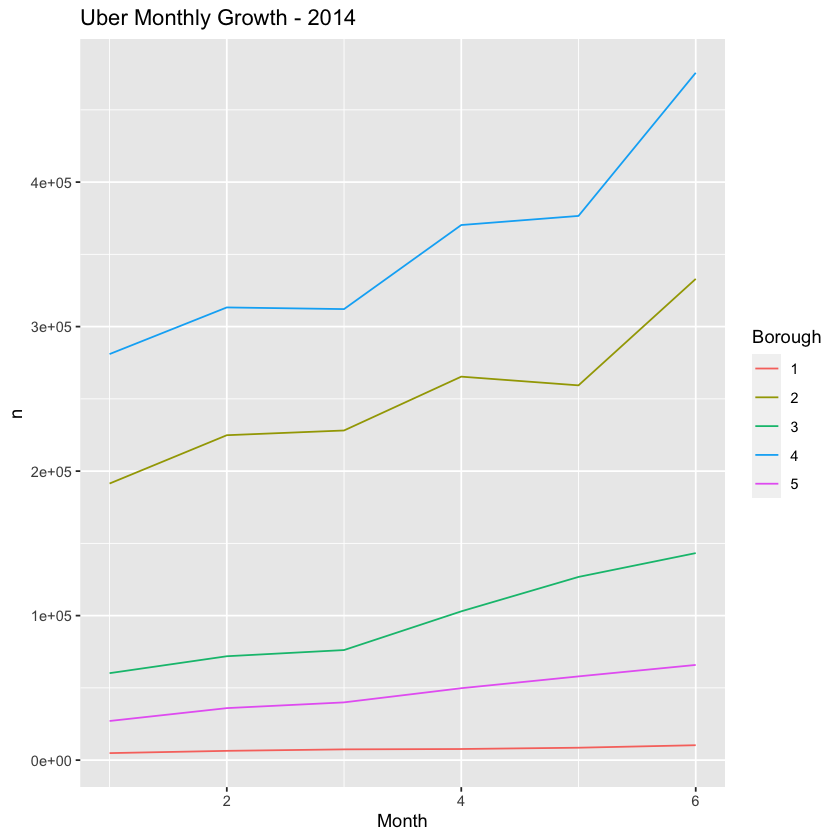

In [30]:
library(dplyr)
monthly_growth <- month_borough_14 %>%
  mutate(Date = paste("04", Month)) %>%
  ggplot(aes(Month, n, colour = Borough)) + geom_line() +
  ggtitle("Uber Monthly Growth - 2014")
monthly_growth